In [53]:
import pandas as pd
import plotnine as pn
from datetime import datetime

In [10]:
scouts = pd.read_csv("data/scouts.tsv", sep="\t")

In [12]:
scouts["dob"] = pd.to_datetime(scouts["dob"])

In [14]:
scouts["age"] = (pd.Timestamp.now() - scouts["dob"]).dt.days // 365

In [20]:
scouts["age_frac"] = (pd.Timestamp.now() - scouts["dob"]).dt.days / 365

In [17]:
scouts.groupby("age")[["Name"]].count()

,Name
age,
11,8
12,9
13,2
14,6
15,10
16,2
17,7


In [27]:
scouts.groupby(["Patrol", "Gender"])[["Name"]].count()

Name
Patrol        Gender      
1st Claremont Female     1
              Male       5
Bateleurs     Female     4
              Male       3
Bokmakieries  Female     4
              Male       3
Eagles        Female     3
              Male       2
Goshawks      Female     3
              Male       4
Kestrels      Female     3
              Male       3
Swifts        Female     3
              Male       3

In [24]:
len(scouts)

44

In [38]:
temp = scouts[scouts["Patrol"] != "1st Claremont"]

In [41]:
temp = temp.groupby(["Patrol", "age"])[["Name"]].count().reset_index()

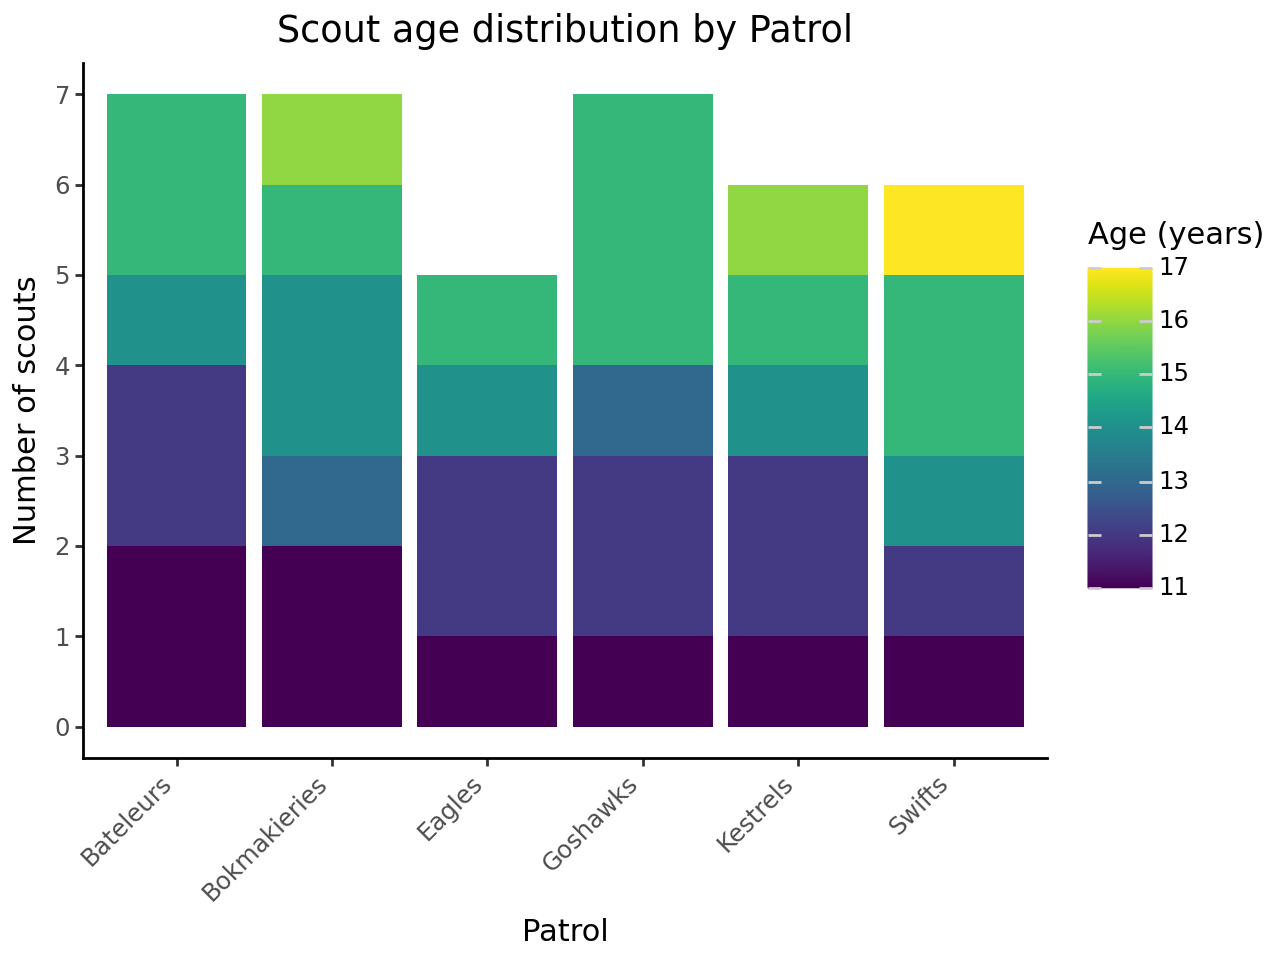

In [48]:

(pn.ggplot(temp, pn.aes(x="Patrol", y="Name", fill="age"))+
 pn.geom_col()+
 pn.theme_classic()+
 pn.theme(axis_text_x=pn.element_text(rotation=45, hjust=1))+
 pn.labs(title="Scout age distribution by Patrol",
         x="Patrol",
         y="Number of scouts",
         fill="Age (years)")+
 pn.scale_y_continuous(breaks=range(0, 10, 1))
)

In [34]:
temp

,FullName,Patrol,Gender,Role,Email,ID,Name,Surname,Phone,dob,DateInvested,age,age_frac
0,Alexander Johanson,Eagles,Male,Patrol Member,alex.johanson006@gmail.com,SSA ID-0043896,Alexander,Johanson,NaN,2012-06-06,2023-08-01,12,12.635616
1,Ariella Young,Swifts,Female,Patrol Member,No Email Address,SSA ID-0050871,Ariella,Young,NaN,2013-10-23,2024-11-01,11,11.254795
2,Avila Van Bever Donker,Goshawks,Female,Patrol Leader,avilavbd@gmail.com,SSA ID-0013913,Avila,Van Bever Donker,NaN,2009-08-05,2020-10-01,15,15.473973
3,Axel Van Bever Donker,Bokmakieries,Male,Patrol Member,axelvbdonker@gmail.com,SSA ID-0023806,Axel,Van Bever Donker,NaN,2012-01-10,2023-02-01,13,13.041096
4,Bridget Halse,Eagles,Female,Assistant Patrol Leader,bridget@mombe.org,SSA ID-0033523,Bridget,Halse,(082) 398-6520,2010-09-09,2021-10-01,14,14.378082
5,Christopher Du Toit,Bokmakieries,Male,Patrol Member,No Email Address,SSA ID-0032630,Christopher,Du Toit,NaN,2013-06-29,2024-07-01,11,11.572603
6,Cian Crowster,Goshawks,Male,Patrol Member,No Email Address,SSA ID-0049614,Cian,Crowster,NaN,2011-05-20,2023-09-21,13,13.684932
7,Claire Cameron,Eagles,Female,Patrol Member,No Email Address,SSA ID-0053881,Claire,Cameron,NaN,2013-03-20,2024-05-09,11,11.849315
8,Diya Dhanjee,Goshawks,Female,Patrol Member,No Email Address,SSA ID-0033364,Diya,Dhanjee,NaN,2013-09-02,2024-09-12,11,11.394521
9,Emily Gilham,Swifts,Female,Assistant Patrol Leader,eb.gilham@gmail.com,SSA ID-0013641,Emily,Gilham,(064) 704-8055,2009-11-23,2021-03-25,15,15.172603


In [49]:
badges = pd.read_csv("data/badges.tsv", sep="\t")

In [50]:
badges

,Date,Scout,Badge,Marked on SD,Handed Out,Needs Ordering,Added By,Patrol,Type,Points
0,13-10-2024,Alexander Johanson,First Aid (Sc),True,False,True,Daniel Le Jeune,Eagles,Scoutcraft Badge,10.0
1,29-09-2024,Alexander Johanson,LDC 1,True,False,False,Daniel Le Jeune,Eagles,Special Badge,10.0
2,06-10-2024,Alexander Johanson,Conservation,True,False,True,Daniel Le Jeune,Eagles,Scoutcraft Badge,10.0
3,29-11-2024,Alexander Johanson,Athletics,True,False,False,Daniel Le Jeune,Eagles,Scoutcraft Badge,10.0
4,01-12-2024,Axel Van Bever Donker,Traveller - Adventure,True,False,False,Daniel Le Jeune,Bokmakieries,Theme Badge,10.0
...,...,...,...,...,...,...,...,...,...,...
789,19-12-2023,William Lunn,Sharpshooter,True,True,True,Daniel Le Jeune,Kestrels,Interest Badge,20.0
790,19-12-2023,William Lunn,Sports Fan,True,True,True,Daniel Le Jeune,Kestrels,Scoutcraft Badge,10.0
791,29-11-2023,William Lunn,Swimming (Sc),True,True,True,Daniel Le Jeune,Kestrels,Scoutcraft Badge,10.0
792,20-02-2022,Zoë Halse,First Aid (Sc),True,True,True,Jonathan Webb,Eagles,Scoutcraft Badge,10.0


In [51]:
badges["Date"] = pd.to_datetime(badges["Date"])

/tmp/ipykernel_150966/2135831284.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.


In [65]:
end_2023 = datetime(2023, 12, 8) #Include
end_2024 = datetime(2024, 12, 6) # Exclude

In [66]:
badges_filtered = badges[(badges["Date"] >= end_2023) & (badges["Date"] < end_2024)]

In [67]:
len(badges_filtered)

246

In [58]:
badges_filtered

,Date,Scout,Badge,Marked on SD,Handed Out,Needs Ordering,Added By,Patrol,Type,Points
0,2024-10-13,Alexander Johanson,First Aid (Sc),True,False,True,Daniel Le Jeune,Eagles,Scoutcraft Badge,10.0
1,2024-09-29,Alexander Johanson,LDC 1,True,False,False,Daniel Le Jeune,Eagles,Special Badge,10.0
2,2024-10-06,Alexander Johanson,Conservation,True,False,True,Daniel Le Jeune,Eagles,Scoutcraft Badge,10.0
3,2024-11-29,Alexander Johanson,Athletics,True,False,False,Daniel Le Jeune,Eagles,Scoutcraft Badge,10.0
4,2024-12-01,Axel Van Bever Donker,Traveller - Adventure,True,False,False,Daniel Le Jeune,Bokmakieries,Theme Badge,10.0
...,...,...,...,...,...,...,...,...,...,...
785,2023-12-07,William Lunn,Athletics,True,True,True,Daniel Le Jeune,Kestrels,Scoutcraft Badge,10.0
787,2023-12-19,William Lunn,Observation,True,True,True,Daniel Le Jeune,Kestrels,Scoutcraft Badge,10.0
788,2023-12-07,William Lunn,Religion & Life,True,True,True,Daniel Le Jeune,Kestrels,Scoutcraft Badge,10.0
789,2023-12-19,William Lunn,Sharpshooter,True,True,True,Daniel Le Jeune,Kestrels,Interest Badge,20.0


In [69]:
badges_filtered.groupby("Type")[["Scout"]].count()

,Scout
Type,
Advancement Badge,11
Challenge Badge,10
Event Badge,9
Interest Badge,56
Scoutcraft Badge,73
Special Badge,8
Theme Badge,79


In [70]:
badges_filtered[badges_filtered["Type"] == "Advancement Badge"].groupby("Badge")[["Scout"]].count()

,Scout
Badge,
Discoverer,4
First Class,2
Springbok,2
Traveller,3


In [72]:
temp = badges_filtered[badges_filtered["Type"] == "Theme Badge"].groupby("Badge")[
    ["Scout"]
].count().reset_index()

In [74]:
temp[["Level", "Category"]] = temp["Badge"].str.split(" - ", expand=True)

In [76]:
temp.to_clipboard()

In [77]:
temp.groupby(["Level"])[["Scout"]].sum()

,Scout
Level,
Discoverer,24
First Class,21
Springbok,12
Traveller,22


In [78]:
badges_filtered["Scout"].nunique()

48

In [99]:
badges = badges_filtered["Scout"].astype(str)

In [101]:
badges_filtered[~badges_filtered["Scout"].isin(scouts["FullName"])]

,Date,Scout,Badge,Marked on SD,Handed Out,Needs Ordering,Added By,Patrol,Type,Points
97,2024-10-13,Anjali Dhanjee,First Aid (Sc),True,True,True,Daniel Le Jeune,Kestrels,Scoutcraft Badge,10.0
98,2024-11-27,Jenny Kenyon-Wimbush,Sports Fan,True,True,False,Daniel Le Jeune,Swifts,Scoutcraft Badge,10.0
99,2024-11-14,Oliver Hewson,First Class - Safety Awareness,True,True,False,Daniel Le Jeune,1st Claremont,Theme Badge,10.0
100,2024-11-09,Oliver Hewson,First Class - Living Outdoors,True,True,False,Daniel Le Jeune,1st Claremont,Theme Badge,10.0
101,2024-11-27,Oliver Hewson,First Class - Adventure,True,True,False,Daniel Le Jeune,1st Claremont,Theme Badge,10.0
102,2024-11-07,Oliver Hewson,First Class - Service,True,True,False,Daniel Le Jeune,1st Claremont,Theme Badge,10.0
103,2024-11-27,Oliver Hewson,First Class - Personal Development,True,True,False,Daniel Le Jeune,1st Claremont,Theme Badge,10.0
104,2024-10-18,Oliver Curling,JOTI,True,True,False,Daniel Le Jeune,Eagles,Event Badge,0.0
105,2024-10-18,Oliver Hewson,JOTI,True,True,False,Daniel Le Jeune,1st Claremont,Event Badge,0.0
234,2024-05-09,Gianna Jason,Fires & Cooking,True,True,True,Daniel Le Jeune,Bokmakieries,Scoutcraft Badge,10.0


In [103]:
scouts[~scouts["FullName"].isin(badges_filtered["Scout"])]["FullName"].to_clipboard()

In [97]:
scouts

,FullName,Patrol,Gender,Role,Email,ID,Name,Surname,Phone,dob,DateInvested,age,age_frac
0,Alexander Johanson,Eagles,Male,Patrol Member,alex.johanson006@gmail.com,SSA ID-0043896,Alexander,Johanson,NaN,2012-06-06,2023-08-01,12,12.635616
1,Ariella Young,Swifts,Female,Patrol Member,No Email Address,SSA ID-0050871,Ariella,Young,NaN,2013-10-23,2024-11-01,11,11.254795
2,Avila Van Bever Donker,Goshawks,Female,Patrol Leader,avilavbd@gmail.com,SSA ID-0013913,Avila,Van Bever Donker,NaN,2009-08-05,2020-10-01,15,15.473973
3,Axel Van Bever Donker,Bokmakieries,Male,Patrol Member,axelvbdonker@gmail.com,SSA ID-0023806,Axel,Van Bever Donker,NaN,2012-01-10,2023-02-01,13,13.041096
4,Bridget Halse,Eagles,Female,Assistant Patrol Leader,bridget@mombe.org,SSA ID-0033523,Bridget,Halse,(082) 398-6520,2010-09-09,2021-10-01,14,14.378082
5,Christopher Du Toit,Bokmakieries,Male,Patrol Member,No Email Address,SSA ID-0032630,Christopher,Du Toit,NaN,2013-06-29,2024-07-01,11,11.572603
6,Cian Crowster,Goshawks,Male,Patrol Member,No Email Address,SSA ID-0049614,Cian,Crowster,NaN,2011-05-20,2023-09-21,13,13.684932
7,Claire Cameron,Eagles,Female,Patrol Member,No Email Address,SSA ID-0053881,Claire,Cameron,NaN,2013-03-20,2024-05-09,11,11.849315
8,Diya Dhanjee,Goshawks,Female,Patrol Member,No Email Address,SSA ID-0033364,Diya,Dhanjee,NaN,2013-09-02,2024-09-12,11,11.394521
9,Emily Gilham,Swifts,Female,Assistant Patrol Leader,eb.gilham@gmail.com,SSA ID-0013641,Emily,Gilham,(064) 704-8055,2009-11-23,2021-03-25,15,15.172603


In [106]:
badges_filtered.groupby("Badge")[["Scout"]].count().reset_index().sort_values("Scout", ascending=False).head(10).to_clipboard()

In [108]:
events = pd.read_csv("data/events.tsv", sep="\t")

In [110]:
events["Date"] = pd.to_datetime(events["Date"], format="%d-%m-%Y")

In [111]:
events = events[events["Date"] >= end_2023]
events = events[events["Date"] < end_2024]


In [127]:
events.groupby(["Activity", "Type"])[["Scout"]].count().reset_index().groupby("Type")[["Activity"]].count().sort_values("Activity", ascending=False).reset_index().to_clipboard()

In [114]:
events["Activity"].nunique()

67

In [121]:
events["Type"].value_counts()

Type
Troop Activity              158
Troop Camp                   58
Patrol Half Day Event        45
Overnight activity           42
Troop Half-Day Event         37
Half-Day Event               35
Troop Overnight Activity     32
Patrol Community Service     31
Patrol Day Activity          18
Troop Day Hike               16
Patrol Camp                  15
Day Activity                 13
Troop Overnight Hike         12
Competition Day              11
Patrol Hike                  11
Patrol Overnight Hike         8
Regional Day Activity         5
Name: count, dtype: int64

In [129]:
events.groupby("Activity")[["Scout"]].count().reset_index().sort_values("Scout", ascending=False).to_clipboard()

In [131]:
events["Patrol"].unique()

array(['Eagles', 'Goshawks', 'Kestrels', 'Swifts', 'Bokmakieries',
       'Bateleurs', '1st Claremont'], dtype=object)

In [132]:
event_overview = pd.read_csv("data/event_summary.tsv", sep="\t")

In [133]:
event_overview["Date"] = pd.to_datetime(event_overview["Date"], format="%d-%m-%Y")

In [135]:
event_overview = event_overview[event_overview["Date"] >= end_2023]
event_overview = event_overview[event_overview["Date"] < end_2024]

In [138]:
event_overview[~event_overview["Patrol"].isna()].groupby("Patrol")[["Name"]].count()

,Name
Patrol,
1st Claremont,4
Bateleurs,5
Bokmakieries,1
Eagles,3
Goshawks,4
Kestrels,10
Swifts,1


In [139]:
event_overview[event_overview["Patrol"]== "Kestrels"]

,Name,Date,Type,Scouter,Scout,Patrol
114,James SB Camp,2024-01-14,Troop Camp,Daniel Le Jeune,James Webb,Kestrels
128,Juliet DE Cooks Meal,2024-03-09,Half-Day Event,Daniel Le Jeune,Juliet Darcy-evans,Kestrels
130,James SB Hike,2024-03-17,Troop Overnight Hike,Daniel Le Jeune,James Webb,Kestrels
131,Laura O Pancake Community Service,2024-04-06,Patrol Community Service,Daniel Le Jeune,Laura Owens,Kestrels
134,Kestrels Joint Patrol Activity (3rd Pinelands),2024-04-20,Patrol Half Day Event,Daniel Le Jeune,Laura Owens,Kestrels
136,Kestrels Total Ninja Outing,2024-04-26,Patrol Half Day Event,Daniel Le Jeune,James Webb,Kestrels
161,Laura O Cooks Meal,2024-10-12,Patrol Half Day Event,Daniel Le Jeune,Laura Owens,Kestrels
168,Laura O first class community service,2024-11-16,Patrol Community Service,Daniel Le Jeune,Laura Owens,Kestrels
172,Oliver VzS Cooks Meal,2024-10-27,Patrol Half Day Event,Daniel Le Jeune,Oliver Van Zyl Smit,Kestrels
173,Laura O First Class Expedition,2024-09-21,Patrol Overnight Hike,Daniel Le Jeune,Laura Owens,Kestrels


In [142]:
badges_filtered[["Date", "Scout", "Badge"]].to_clipboard()